In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
plt.style.use('ggplot')

In [130]:
df = pd.read_csv('train.csv')
df.head()
#Ler o arquivo CSV e buscar os primeiros 5 campos.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [131]:
df.dtypes
#Identificar se todos os atributos estão corretos

Loan_ID               object
Gender               float64
Married               object
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [132]:
df.shape
# Saber o número de linhas e colunas

(614, 13)

In [133]:
df.describe()

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,614.000000,564.000000
mean,0.817590,0.744300,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.842199
std,0.386497,1.009623,0.413389,0.340446,6109.041673,2926.248369,85.587325,64.428629,0.364878
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [134]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020773926E10>,
      dtype=object)

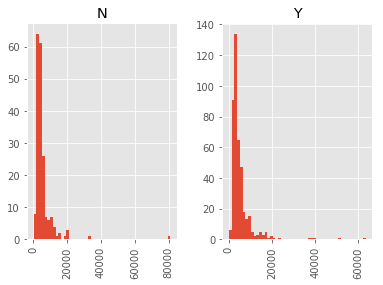

In [135]:
df[['Loan_Status','ApplicantIncome']].hist(bins=50, by='Loan_Status') 
#bins é o numero de colunas que vão aparecer no histograma
#by serve para dividir por uma coluna

In [136]:
coapplicants = df['CoapplicantIncome']
coapplicants.head()
#foi realizado para ver os valores que possuem coapplicants

0       0.0
1    1508.0
2       0.0
3    2358.0
4       0.0
Name: CoapplicantIncome, dtype: float64

In [137]:
coapplicants = coapplicants.apply(lambda x: 'N' if x== 0 else 'Y') # mesma função que a linha debaixo

In [138]:
def nome_de_funcao(x):
    if x==0:
        return 'N'
    else:
        return 'Y'

In [139]:
coapplicants.value_counts()

Y    341
N    273
Name: CoapplicantIncome, dtype: int64

In [140]:
df.drop('Loan_ID', axis=1, inplace = True)
#se fizesse só o drop tentaria excluir apenas a linha loan_id. 
#axis=1 é para selecionar a coluna inteira 


In [141]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [142]:
df.columns = ['is_Male','is_Married','Dependents','is_Graduated','is_Self_Employed',
              'ApplicantIncome','CoapplicantIncome', 'LoanAmount','Loan_Amount_Term',
              'has_Credit_History','Property_Area', 'Loan_Status']

In [143]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Property_Area,Loan_Status
0,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [144]:
mapper = {'Yes':1,'No':0}
df['is_Married'] = df['is_Married'].map(mapper)

In [145]:
mapper2 = {'Y':1, 'N':0}
df['Loan_Status'] = df['Loan_Status'].map(mapper2)

In [146]:
df.isnull().sum().sort_values(ascending=False)


has_Credit_History    50
LoanAmount            22
is_Married             3
Loan_Status            0
Property_Area          0
Loan_Amount_Term       0
CoapplicantIncome      0
ApplicantIncome        0
is_Self_Employed       0
is_Graduated           0
Dependents             0
is_Male                0
dtype: int64

In [148]:
df.dropna(subset=['is_Married'],inplace =True)

In [149]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [150]:
df['has_Credit_History'].fillna(1, inplace=True)


In [151]:
df = pd.get_dummies(df, columns=['Property_Area'])

In [152]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.369492,360.0,1.0,1,0,0,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,1,0,0,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,1,0,0,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,1,0,0,1


In [159]:
df.isnull().sum().sort_values(ascending=False)

TotalIncome                0
Property_Area_Urban        0
Property_Area_Semiurban    0
Property_Area_Rural        0
Loan_Status                0
has_Credit_History         0
Loan_Amount_Term           0
LoanAmount                 0
CoapplicantIncome          0
ApplicantIncome            0
is_Self_Employed           0
is_Graduated               0
Dependents                 0
is_Married                 0
is_Male                    0
dtype: int64

In [153]:
#Criar propria paleta de cores
from matplotlib.colors import ListedColormap

flatui = ['#FF0000','#E34645','#FFFFFF','#FFFFFF','#FFFFFF','#E34646','#FF0000']
my_cmap = ListedColormap(sns.color_palette(flatui).as_hex())

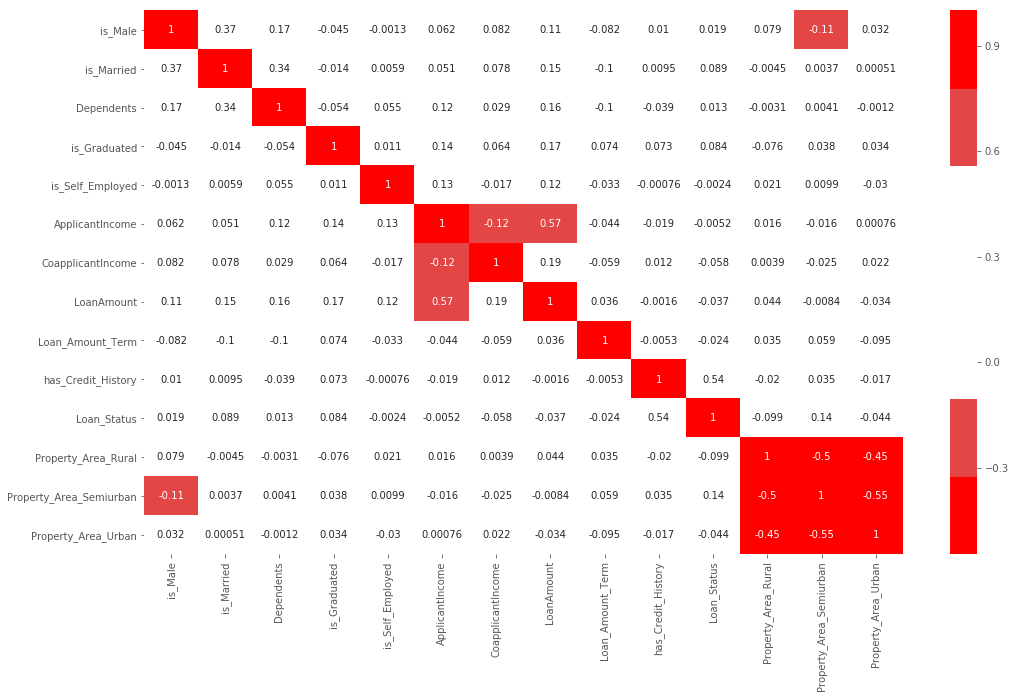

In [154]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(), annot = True, cmap = my_cmap)
plt.show()

In [155]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.369492,360.0,1.0,1,0,0,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,1,0,0,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,1,0,0,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,1,0,0,1


In [156]:
df['TotalIncome'] = df['ApplicantIncome']+df['CoapplicantIncome']

In [157]:
#como os valores são muito altos, utilizou log para normalizar em um valor menor
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df['TotalIncome'] = np.log(df['TotalIncome'])
df.loc[df['CoapplicantIncome']== 0, 'CoapplicantIncome']= 1
df['CoapplicantIncome'] = np.log(df['CoapplicantIncome'])

In [158]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalIncome
0,1.0,0.0,0.0,1,0.0,8.674026,0.000000,146.369492,360.0,1.0,1,0,0,1,8.674026
1,1.0,1.0,1.0,1,0.0,8.430109,7.318540,128.000000,360.0,1.0,0,1,0,0,8.714568
2,1.0,1.0,0.0,1,1.0,8.006368,0.000000,66.000000,360.0,1.0,1,0,0,1,8.006368
3,1.0,1.0,0.0,0,0.0,7.856707,7.765569,120.000000,360.0,1.0,1,0,0,1,8.505323
4,1.0,0.0,0.0,1,0.0,8.699515,0.000000,141.000000,360.0,1.0,1,0,0,1,8.699515


# Treinar modelo

In [160]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [173]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

print('Score no conjunto de treino: {0:.2%} '.format(lr.score(X_train,y_train)))
print('Score no conjunto de teste: {0:.2%} '.format(lr.score(X_test,y_test)))

Score no conjunto de treino: 80.44% 
Score no conjunto de teste: 82.18% 


In [186]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train,y_train)

print('Score no conjunto de treino: {0:.2%} '.format(dt.score(X_train,y_train)))
print('Score no conjunto de teste: {0:.2%} '.format(dt.score(X_test,y_test)))

Score no conjunto de treino: 82.64% 
Score no conjunto de teste: 83.17% 


In [187]:
importance = list(zip(dt.feature_importances_,X_train.columns))
importance

[(0.01066161532525964, 'is_Male'),
 (0.0, 'is_Married'),
 (0.0, 'Dependents'),
 (0.0, 'is_Graduated'),
 (0.0, 'is_Self_Employed'),
 (0.00863590841346034, 'ApplicantIncome'),
 (0.044333492287932756, 'CoapplicantIncome'),
 (0.025364711692750164, 'LoanAmount'),
 (0.0231180994359439, 'Loan_Amount_Term'),
 (0.7224260802273454, 'has_Credit_History'),
 (0.0, 'Property_Area_Rural'),
 (0.05914039870676859, 'Property_Area_Semiurban'),
 (0.0, 'Property_Area_Urban'),
 (0.10631969391053918, 'TotalIncome')]

In [198]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train,y_train)

print('Score no conjunto de treino: {0:.2%} '.format(rf.score(X_train,y_train)))
print('Score no conjunto de teste: {0:.2%} '.format(rf.score(X_test,y_test)))

Score no conjunto de treino: 98.78% 
Score no conjunto de teste: 75.25% 


In [199]:
dt.predict([X_test.iloc[0]])

array([1], dtype=int64)

In [200]:
X_test['Loan_Status'] = dt.predict(X_test)

C:\Users\Ricardo Reis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [202]:
X_test.to_csv('clientes_previstos.csv', index=False)

In [205]:
import pickle
pickle.dump(dt,open('modelo.sav','wb'))